## Data Cleaning 

You'll notice that this dataset is by no means ready for analysis. We have:

* a numeric column interpreted as a string
* extra columns that are not relevant to our analysis
* multiple rows with missing values
* column names are too long

Let's "clean" our dataset by fixing these errors below.

In [7]:
# import required modules for this project

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# TODO: load in excel file "../../data/raw/realestate.xlsx"
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html
file_path = "../../data/raw/realestate.xlsx"

df = pd.read_excel(file_path)

# check how many missing values we have
missing_values = df.isna().sum()

# Print the results
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
No                                         0
X2 house age                              11
X3 distance to the nearest MRT station     0
X4 number of convenience stores            1
X5 latitude                                0
X6 longitude                               0
Y house price of unit area                 0
dtype: int64


In [9]:
# create dictionary of mappings
rename_dict = {
    "X2 house age": "house_age", 
    "X3 distance to the nearest MRT station": "distance_to_mrt", 
    "X4 number of convenience stores": "num_convenience_stores",
    "X5 latitude": "lat",
    "X6 longitude": "long",
    "Y house price of unit area": "price_unit_area"
}

# Rename columns using the dictionary
df.rename(columns=rename_dict, inplace=True)

print("New column names:")
print(df.columns)

New column names:
Index(['No', 'house_age', 'distance_to_mrt', 'num_convenience_stores', 'lat',
       'long', 'price_unit_area'],
      dtype='object')


In [10]:
selected = ["A", "B"]
df = df.drop(columns=selected)

# TODO: Drop the selected columns 
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

KeyError: "['A', 'B'] not found in axis"

In [ ]:
# Convert 'distance_to_mrt' column to string type
df['distance_to_mrt'] = df['distance_to_mrt'].astype(str)

# Remove quotes from the 'distance_to_mrt' column
df['distance_to_mrt'] = df['distance_to_mrt'].str.replace('"', '')

# Now you can proceed to convert it to float
df['distance_to_mrt'] = df['distance_to_mrt'].astype(float)


KeyError: 'distance_to_mrt'

In [ ]:
df_drop.columns

NameError: name 'df_drop' is not defined

In [ ]:
# check current "shape" of dataframe
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
df_drop = df.drop('A', axis=1)

df_drop.shape

shape = df.shape
print("DataFrame shape (rows, columns):", shape)

DataFrame shape (rows, columns): (3, 2)


In [ ]:
# TODO: Remove missing values from this dataframe
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
df.dropna(inplace=True)
# check shape again
shape_after_dropna = df.shape
print("DataFrame shape after removing missing values (rows, columns):", shape_after_dropna)

DataFrame shape after removing missing values (rows, columns): (3, 0)


## Explore Again

Now that we've cleaned our dataset, let's again explore the relationships & distributions of our dataset. 

Perhaps we missed something "qualitative" about our data that we should remove. 

In [ ]:
# TODO: print out the summary statistics (mean, median, max, min, count) of all numeric columns
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

summary_statistics = df.describe()

print("Summary Statistics of Numeric Columns:")
print(summary_statistics)

Summary Statistics of Numeric Columns:
         A    B
count  3.0  3.0
mean   2.0  5.0
std    1.0  1.0
min    1.0  4.0
25%    1.5  4.5
50%    2.0  5.0
75%    2.5  5.5
max    3.0  6.0


In [ ]:
# notice how the minimum value for "num_convenience_stores" is -6
# how do we have -6 convenience stores? this must be an error, let's remove it

# Remove rows with negative values in the "num_convenience_stores" column
df_outl = df[df["num_convenience_stores"] >= 0]

# Check the shape of the DataFrame after removing outliers
shape_after_remove_outliers = df_outl.shape

print("DataFrame shape after removing negative values in 'num_convenience_stores' column (rows, columns):", shape_after_remove_outliers)

# Check the shape of the DataFrame after removing outliers
shape_after_remove_outliers = df_outl.shape

print("DataFrame shape after removing negative values in 'num_convenience_stores' column (rows, columns):", shape_after_remove_outliers)


KeyError: 'num_convenience_stores'

In [ ]:
# notice how the maximum value for "num_convenience_stores" is 100
# (the median convenice stores is 4, the mean is 4.29, this shows that this is most likely an error)

# TODO: implement this logic in the brackets
# documentation: https://pandas.pydata.org/docs/user_guide/indexing.html#boolean-indexing

# Filter out rows with "num_convenience_stores" values greater than a certain threshold (e.g., 10)
threshold = 10
df_outl = df_outl[df_outl["num_convenience_stores"] <= threshold]

shape_after_threshold = df_outl.shape

print("DataFrame shape after filtering 'num_convenience_stores' values (rows, columns):", shape_after_threshold)


DataFrame shape after filtering 'num_convenience_stores' values (rows, columns): (401, 4)


In [ ]:
# notice how the maximum "house_age" is 410.3 years old 
# not looking at statistics, the oldest house in Taiwan was built in the 17th century (300 years at most)
# let's remove this value

# Remove rows with a "house_age" value that is not within the expected range (e.g., 0 to 300 years)
df_outl = df_outl[(df_outl["house_age"] >= 0) & (df_outl["house_age"] <= 300)]

shape_after_house_age = df_outl.shape

print("DataFrame shape after filtering 'house_age' values (rows, columns):", shape_after_house_age)


DataFrame shape after filtering 'house_age' values (rows, columns): (400, 4)


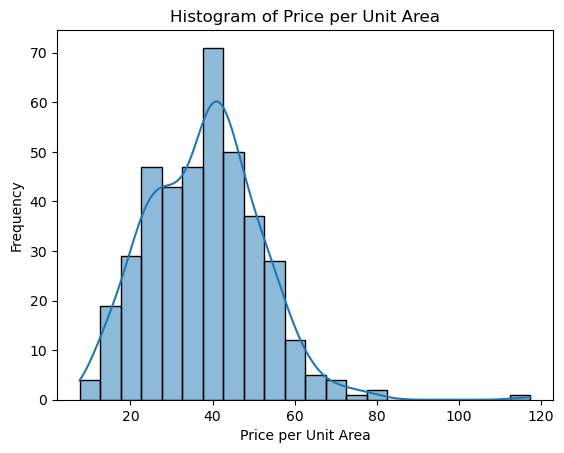

In [ ]:
# let's explore our visualizations again, starting with univariate

# TODO : plot histogram of "price_unit_area" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html

sns.histplot(df_outl["price_unit_area"], kde=True)

plt.xlabel("Price per Unit Area")
plt.ylabel("Frequency")
plt.title("Histogram of Price per Unit Area")

plt.show()

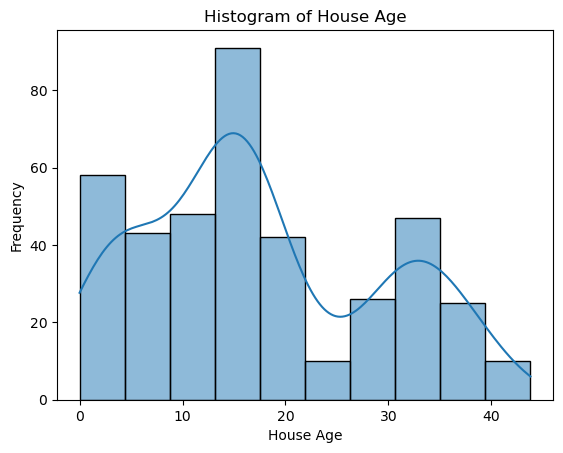

In [ ]:
# TODO : plot histogram of "house_age" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html

sns.histplot(df_outl["house_age"], kde=True)

plt.xlabel("House Age")
plt.ylabel("Frequency")
plt.title("Histogram of House Age")

plt.show()

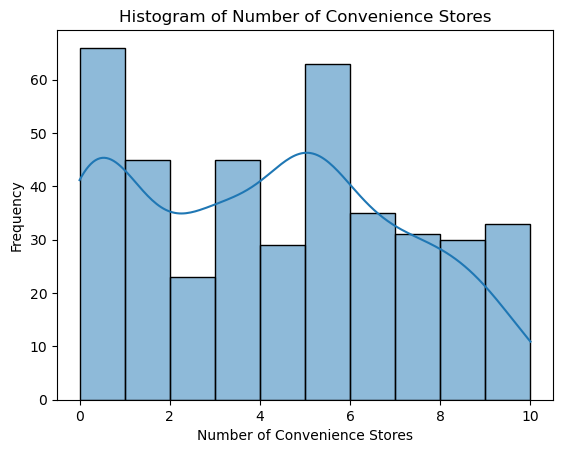

In [ ]:
# TODO : plot histogram of "num_convenience_stores" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html

sns.histplot(df_outl["num_convenience_stores"], kde=True)

plt.xlabel("Number of Convenience Stores")
plt.ylabel("Frequency")
plt.title("Histogram of Number of Convenience Stores")

plt.show()

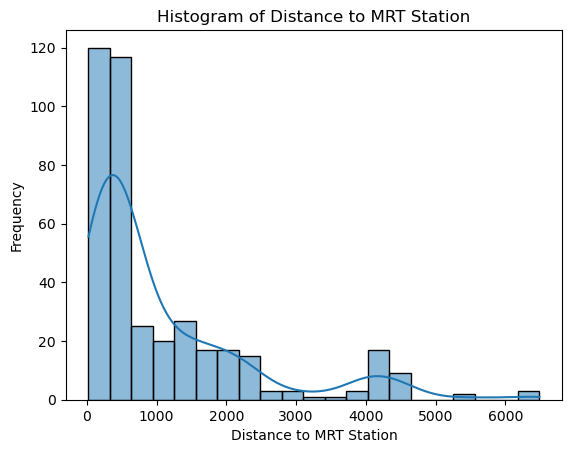

In [ ]:
# TODO : plot histogram of "distance_to_mrt" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html

sns.histplot(df_outl["distance_to_mrt"], kde=True)

plt.xlabel("Distance to MRT Station")
plt.ylabel("Frequency")
plt.title("Histogram of Distance to MRT Station")

plt.show()

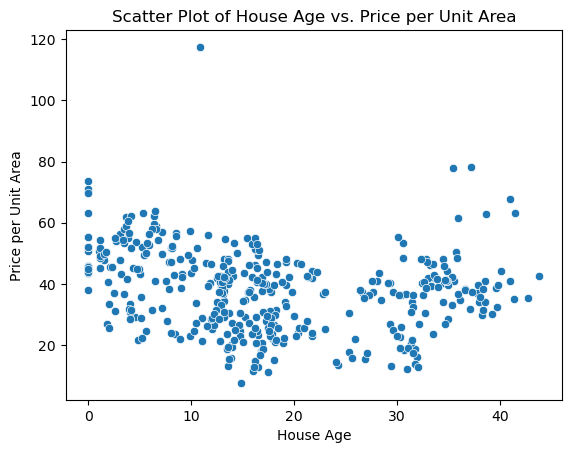

In [ ]:
# next we move onto scatter-plots (bi-variate analysis)

# TODO : plot scatter plot of "house_age" and "price_unit_area"
# documentation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

sns.scatterplot(data=df_outl, x="house_age", y="price_unit_area")

plt.xlabel("House Age")
plt.ylabel("Price per Unit Area")
plt.title("Scatter Plot of House Age vs. Price per Unit Area")

plt.show()

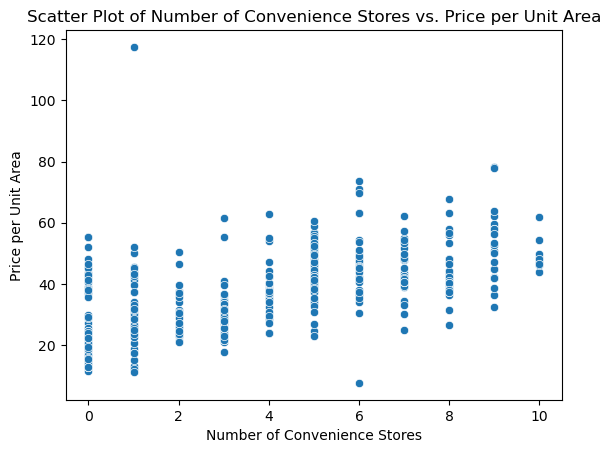

In [ ]:
# TODO : plot scatter plot of "num_convenice_stores" and "price_unit_area"
# documentation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

sns.scatterplot(data=df_outl, x="num_convenience_stores", y="price_unit_area")

plt.xlabel("Number of Convenience Stores")
plt.ylabel("Price per Unit Area")
plt.title("Scatter Plot of Number of Convenience Stores vs. Price per Unit Area")

plt.show()

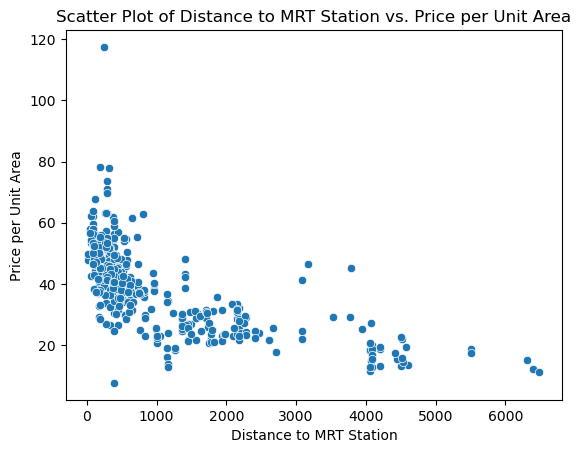

In [ ]:
# TODO : plot scatter plot of "distance_to_mrt" and "price_unit_area"
# documentation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

sns.scatterplot(data=df_outl, x="distance_to_mrt", y="price_unit_area")

plt.xlabel("Distance to MRT Station")
plt.ylabel("Price per Unit Area")
plt.title("Scatter Plot of Distance to MRT Station vs. Price per Unit Area")

plt.show()

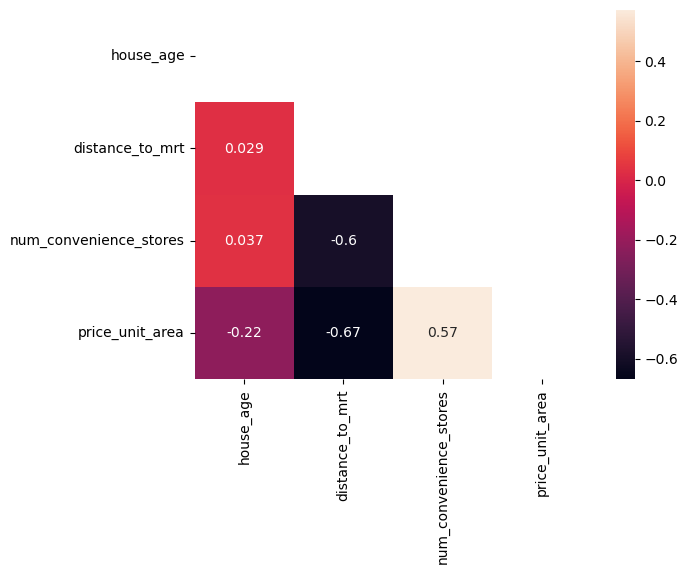

In [ ]:
mask = np.triu(np.ones_like(df_outl.corr(), dtype=bool))

sns.heatmap(df_outl.corr(), annot=True, mask=mask)
plt.show()

In [ ]:
# save data for later modeling
df_drop.to_csv("../../data/processed/tpdata.csv", index=False)